In [1]:
import numpy as np 
import time 

In [2]:
# Seed iss liye de diya taaki harr baar same randon number generate ho 
np.random.seed(2343243)

In [3]:
# This will generate data for us
mean_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1 = np.random.multivariate_normal(mean_vec1, cov_mat1, 20)

In [4]:
class1

array([[-0.32514036,  0.22610065,  0.48469967],
       [ 1.05384813, -1.3052413 ,  0.7359005 ],
       [ 0.38551095,  0.2672257 , -1.20438011],
       [ 2.25670142,  0.94172529, -0.03728418],
       [-0.95603684, -0.19995087, -0.57995145],
       [-1.36879306,  0.26569386,  0.31535807],
       [-0.35790412, -0.3015863 ,  1.51646574],
       [-0.26230775, -0.14996721,  0.44812021],
       [ 1.25348197, -0.07991306, -0.40443938],
       [-0.03593185, -0.18881682,  0.63317947],
       [ 0.17326582,  1.55594386,  0.03100042],
       [ 0.00599328, -0.55773392,  1.47126252],
       [ 0.32543449, -0.54792529,  0.32265615],
       [-0.26115274,  0.30073554, -0.36233296],
       [-0.014962  , -1.28943224,  0.58588548],
       [-0.47023517,  0.3643193 , -0.44802282],
       [-1.39281759, -1.03334488,  0.04853172],
       [-1.34669294, -0.82174841,  2.03388719],
       [-1.39482876, -0.81017223,  0.30524412],
       [ 1.72387731, -0.74529788, -0.06290315]])

In [5]:
mean_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2 = np.random.multivariate_normal(mean_vec1, cov_mat1, 20)

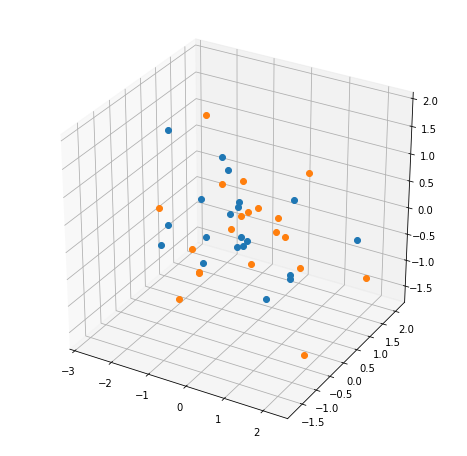

In [6]:
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D, proj3d
# Figure of size 8x8 inches
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.plot(class1[:, 0], class1[:, 1], class1[:, 2], 'o')
ax.plot(class2[:, 0], class2[:, 1], class2[:, 2], 'o')
plt.show()

In [7]:
all_data = np.concatenate((class1, class2))
all_data.shape

(40, 3)

In [8]:
all_data.mean(axis = 0)

array([-0.0439388 , -0.02881412,  0.14109922])

In [9]:
all_data = all_data.T

In [10]:
# To convert 3D to 2D first we need covariance matrix
cov_mat = np.cov(all_data)
cov_mat

array([[ 1.21849331,  0.08238958, -0.17421249],
       [ 0.08238958,  0.63108878, -0.17825843],
       [-0.17421249, -0.17825843,  0.67458504]])

In [11]:
# First array is array of eigen values, second array is array of eigen vectors
eig_val, eig_vec = np.linalg.eig(cov_mat)
eig_val, eig_vec

(array([ 1.29589551,  0.75943103,  0.46884058]),
 array([[ 0.92700416,  0.36603633,  0.08173552],
        [ 0.19996274, -0.66673639,  0.71796761],
        [-0.31729828,  0.6492149 ,  0.69126103]]))

In [12]:
eig_val_vec_pairs = []
for i in range(len(eig_val)):
    eig_vector =eig_vec[:,i] 
    eig_val_vec_pairs.append((eig_val[i],eig_vector))
eig_val_vec_pairs.sort(reverse=True)
matrix_eig = np.array([eig_val_vec_pairs[0][1],eig_val_vec_pairs[1][1]])
matrix_eig

array([[ 0.92700416,  0.19996274, -0.31729828],
       [ 0.36603633, -0.66673639,  0.6492149 ]])

In [13]:
transformed = matrix_eig.dot(all_data)
transformed = transformed.T
transformed.shape

(40, 2)

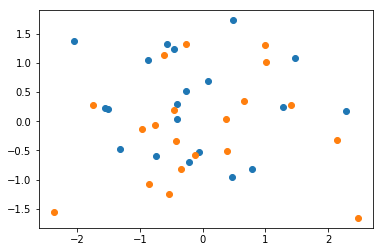

In [14]:
plt.plot(transformed[0:20, 0], transformed[0:20, 1], 'o')
plt.plot(transformed[20:40, 0], transformed[20:40, 1], 'o')
plt.show()

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components = 2)
# Isse -1 se iss liye multiply kra hai taaki yeh humare jaise ki tarah aa jaye baaki koi zaroorat nhi hai 
skl_transformed = pca.fit_transform(all_data.T)*(-1)

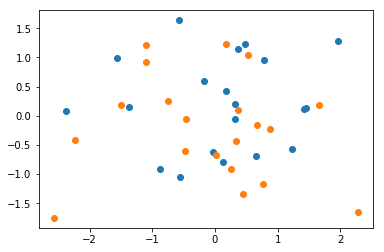

In [17]:
plt.plot(skl_transformed[0:20, 0], skl_transformed[0:20, 1], 'o')
plt.plot(skl_transformed[20:40, 0], skl_transformed[20:40, 1], 'o')
plt.show()